In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ptsd-treatment/ptsd_data.csv


In [31]:
import pandas as pd

df = pd.DataFrame(pd.read_csv("/kaggle/input/ptsd-treatment/ptsd_data.csv"))

df

,id,success,symptoms,method,sessions
0,1,1,2,VR,14
1,2,0,4,IRL,6
2,3,1,5,IRL,9
3,4,1,3,IRL,10
4,5,0,4,VR,5
5,6,0,3,VR,4
6,7,0,5,VR,8
7,8,1,5,VR,8
8,9,1,2,VR,6
9,10,1,4,IRL,12


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

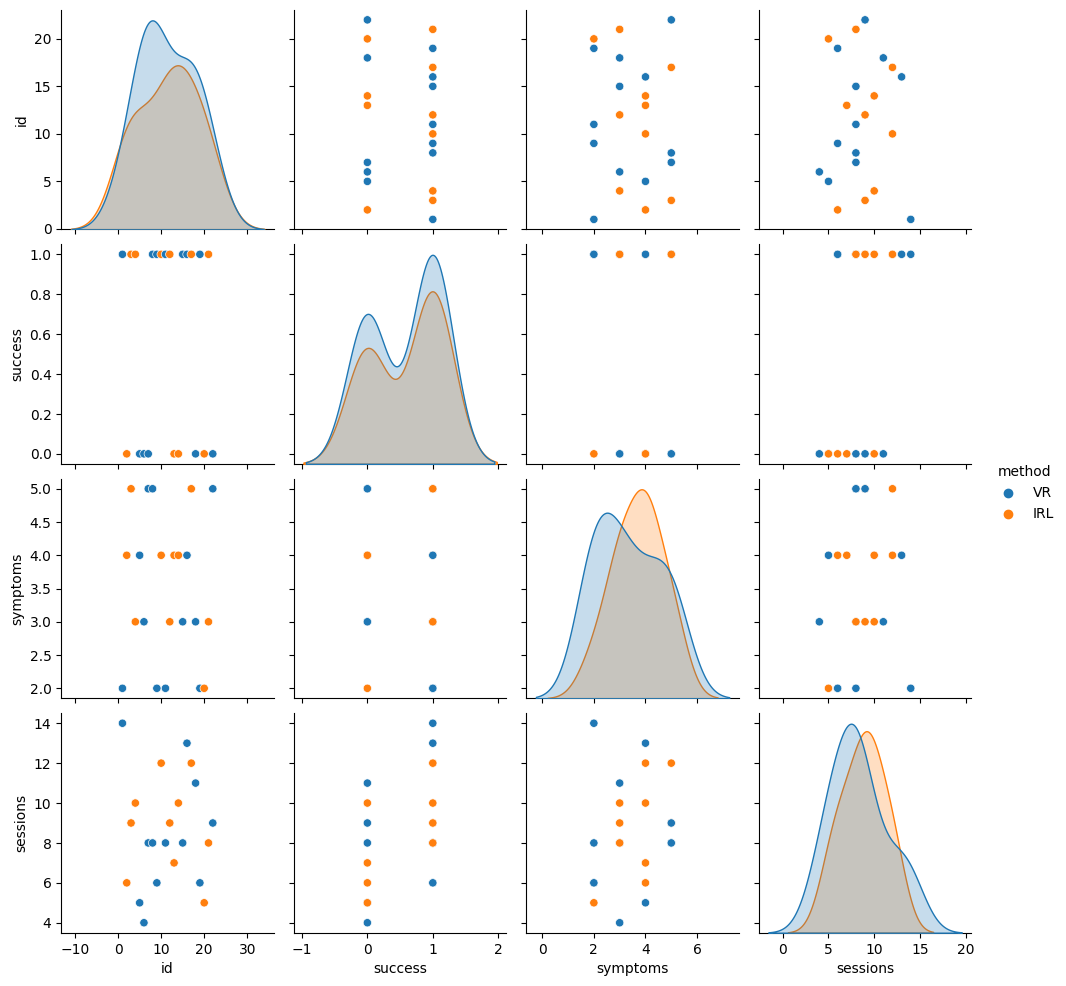

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,hue='method')
plt.show()

In [40]:
VR=df.loc[df['method'] == 'VR']
VR

,id,success,symptoms,method,sessions
0,1,1,2,VR,14
4,5,0,4,VR,5
5,6,0,3,VR,4
6,7,0,5,VR,8
7,8,1,5,VR,8
8,9,1,2,VR,6
10,11,1,2,VR,8
14,15,1,3,VR,8
15,16,1,4,VR,13
17,18,0,3,VR,11


In [34]:
IRL=df.loc[df['method'] == 'IRL']
IRL

,id,success,symptoms,method,sessions
1,2,0,4,IRL,6
2,3,1,5,IRL,9
3,4,1,3,IRL,10
9,10,1,4,IRL,12
11,12,1,3,IRL,9
12,13,0,4,IRL,7
13,14,0,4,IRL,10
16,17,1,5,IRL,12
19,20,0,2,IRL,5
20,21,1,3,IRL,8


In [11]:
sucVR=VR['success'].mean()
sucVR

0.5833333333333334

In [13]:
sucIRL=IRL['success'].mean()
sucIRL

0.6

In [14]:
symVR=VR['symptoms'].mean()
symVR

3.3333333333333335

In [15]:
symIRL=IRL['symptoms'].mean()
symIRL

3.7

In [16]:
sesVR=VR['sessions'].mean()
sesVR

8.333333333333334

In [17]:
sesIRL=IRL['sessions'].mean()
sesIRL

8.8

In [24]:
lesion_type_dict = {
    'VR': 1,
    'IRL': 2,
}
df['method'] = df.method.map(lesion_type_dict)
df['method'] = df["method"].astype(int)

In [25]:
df

,id,success,symptoms,method,sessions
0,1,1,2,1,14
1,2,0,4,2,6
2,3,1,5,2,9
3,4,1,3,2,10
4,5,0,4,1,5
5,6,0,3,1,4
6,7,0,5,1,8
7,8,1,5,1,8
8,9,1,2,1,6
9,10,1,4,2,12


In [26]:
df.corr()

,id,success,symptoms,method,sessions
id,1.000000,-0.051003,-0.083185,0.014389,0.029841
success,-0.051003,1.000000,-0.214678,0.016879,0.416876
symptoms,-0.083185,-0.214678,1.000000,0.169582,0.191832
method,0.014389,0.016879,0.169582,1.000000,0.087982
sessions,0.029841,0.416876,0.191832,0.087982,1.000000


In [42]:
keep_col = ['success','symptoms','sessions']
l = VR[keep_col]
l

,success,symptoms,sessions
0,1,2,14
4,0,4,5
5,0,3,4
6,0,5,8
7,1,5,8
8,1,2,6
10,1,2,8
14,1,3,8
15,1,4,13
17,0,3,11


In [43]:
l.corr()

,success,symptoms,sessions
success,1.000000,-0.478091,0.269680
symptoms,-0.478091,1.000000,0.016116
sessions,0.269680,0.016116,1.000000


In [44]:
keep_col = ['success','symptoms','sessions']
m = IRL[keep_col]
m

,success,symptoms,sessions
1,0,4,6
2,1,5,9
3,1,3,10
9,1,4,12
11,1,3,9
12,0,4,7
13,0,4,10
16,1,5,12
19,0,2,5
20,1,3,8


In [45]:
m.corr()

,success,symptoms,sessions
success,1.000000,0.181444,0.659912
symptoms,0.181444,1.000000,0.518860
sessions,0.659912,0.518860,1.000000


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
X = df.drop(['sessions','method','id','success'],axis= 1)
y = df['sessions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  12.35
mean_absolute_error :  2.75


In [82]:
model.intercept_

3.0

In [83]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[1.0]


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
X = df.drop(['success','method','id'],axis= 1)
y = df['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.5311396840938958
mean_absolute_error :  0.5628172588832487


In [59]:
model.intercept_

-0.6878172588832494

In [61]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[-0.239, 0.269]


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
X = VR.drop(['success','method','id'],axis= 1)
y = VR['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.29705215419501146
mean_absolute_error :  0.44444444444444464


In [63]:
model.intercept_

1.8571428571428572

In [64]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[-0.357, 0.0]


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
X = VR.drop(['sessions','method','id','success'],axis= 1)
y = VR['sessions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  11.555555555555555
mean_absolute_error :  2.888888888888889


In [85]:
model.intercept_

8.0

In [86]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[0.0]


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
X = IRL.drop(['success','method','id'],axis= 1)
y = IRL['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  2.6071428571428603
mean_absolute_error :  1.3571428571428577


In [72]:
model.intercept_

0.9999999999999988

In [73]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[-1.5, 0.5]


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
X = IRL.drop(['sessions','method','id','success'],axis= 1)
y = IRL['sessions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  9.142857142857142
mean_absolute_error :  2.5714285714285716


In [91]:
model.intercept_

3.0000000000000018

In [92]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[2.0]
